# 📊 Análise Exploratória - Previsão de Vendas Boticário

Este notebook contém a análise exploratória completa dos dados de vendas da Boticário, com foco em extrair insights de negócio que informem a estratégia de modelagem.

## 🎯 Objetivos
- Compreender a estrutura e qualidade dos dados
- Identificar padrões temporais (sazonalidade, tendência)
- Analisar impacto de campanhas de marketing
- Explorar relações entre variáveis
- Extrair insights para o negócio

In [2]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.size'] = 12

print("✅ Bibliotecas importadas com sucesso!")

✅ Bibliotecas importadas com sucesso!


### 1. 📥 Carregamento dos Dados

In [37]:
# Função para converter strings com vírgula para float
def convert_to_float(value):
    if pd.isna(value) or value == '':
        return np.nan
    if isinstance(value, str):
        return float(value.replace(',', '.'))
    return float(value)

# Carregando os dados
print("📂 Carregando dataset...")
df = pd.read_csv('C:/Users/leand/Desktop/desafio_boti/dataset.csv', sep=';')

print(f"📊 Shape do dataset: {df.shape}")
print(f"📋 Colunas: {list(df.columns)}")

📂 Carregando dataset...
📊 Shape do dataset: (173923, 18)
📋 Colunas: ['COD_CICLO', 'FLG_DATA', 'COD_MATERIAL', 'COD_CANAL', 'DES_CATEGORIA_MATERIAL', 'DES_MARCA_MATERIAL', 'COD_REGIAO', 'QT_VENDA_BRUTO', 'QT_DEVOLUCAO', 'VL_RECEITA_BRUTA', 'VL_RECEITA_LIQUIDA', 'FLG_CAMPANHA_MKT_A', 'FLG_CAMPANHA_MKT_B', 'FLG_CAMPANHA_MKT_C', 'FLG_CAMPANHA_MKT_D', 'FLG_CAMPANHA_MKT_E', 'PCT_DESCONTO', 'VL_PRECO']


In [33]:
# Convertendo colunas numéricas que estão como string
numeric_cols = ['QT_VENDA_BRUTO', 'VL_RECEITA_BRUTA', 'VL_RECEITA_LIQUIDA', 'PCT_DESCONTO', 'VL_PRECO']

print("🔄 Convertendo tipos de dados...")
for col in numeric_cols:
    if col in df.columns:
        df[col] = df[col].apply(convert_to_float)

print("✅ Conversão concluída!")
df.head()

🔄 Convertendo tipos de dados...
✅ Conversão concluída!


,COD_CICLO,FLG_DATA,COD_MATERIAL,COD_CANAL,DES_CATEGORIA_MATERIAL,DES_MARCA_MATERIAL,COD_REGIAO,QT_VENDA_BRUTO,QT_DEVOLUCAO,VL_RECEITA_BRUTA,VL_RECEITA_LIQUIDA,FLG_CAMPANHA_MKT_A,FLG_CAMPANHA_MKT_B,FLG_CAMPANHA_MKT_C,FLG_CAMPANHA_MKT_D,FLG_CAMPANHA_MKT_E,PCT_DESCONTO,VL_PRECO
0,201917,1,431148,anon_S0,anon_S2,anon_S3,anon_S1,11934.0,414.0,431869.08,431869.08,0,0,0,0,0,NaN,455.4
1,202005,0,177816,anon_S0,anon_S2,anon_S4,anon_S1,540.0,252.0,27743.40,27743.40,0,0,0,0,0,NaN,773.4
2,201901,0,171786,anon_S0,anon_S5,anon_S6,anon_S1,54012.0,1410.0,962860.20,962860.20,0,1,0,0,0,35.0,341.4
3,201813,0,177774,anon_S7,anon_S2,anon_S8,anon_S1,438.0,NaN,7608.60,7608.60,0,0,0,0,0,NaN,450.9
4,202006,1,446592,anon_S0,anon_S5,anon_S9,anon_S1,2760.0,240.0,83339.40,83339.40,0,0,0,0,0,NaN,431.4


In [34]:
# Informações gerais do dataset
print("📋 INFORMAÇÕES GERAIS DO DATASET")
print("=" * 50)
print(f"Registros: {df.shape[0]:,}")
print(f"Variáveis: {df.shape[1]}")
print(f"Período: {df['COD_CICLO'].min()} a {df['COD_CICLO'].max()}")
print(f"Ciclos únicos: {df['COD_CICLO'].nunique()}")

df.info()

📋 INFORMAÇÕES GERAIS DO DATASET
Registros: 173,923
Variáveis: 18
Período: 201801 a 202101
Ciclos únicos: 53
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173923 entries, 0 to 173922
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   COD_CICLO               173923 non-null  int64  
 1   FLG_DATA                173923 non-null  int64  
 2   COD_MATERIAL            173923 non-null  int64  
 3   COD_CANAL               173923 non-null  object 
 4   DES_CATEGORIA_MATERIAL  173923 non-null  object 
 5   DES_MARCA_MATERIAL      173923 non-null  object 
 6   COD_REGIAO              173923 non-null  object 
 7   QT_VENDA_BRUTO          173923 non-null  float64
 8   QT_DEVOLUCAO            87164 non-null   float64
 9   VL_RECEITA_BRUTA        173923 non-null  float64
 10  VL_RECEITA_LIQUIDA      173923 non-null  float64
 11  FLG_CAMPANHA_MKT_A      173923 non-null  int64  
 12  FLG_CAMPANHA_MKT_B  

In [35]:
# Estatísticas descritivas
print("📊 ESTATÍSTICAS DESCRITIVAS")
print("=" * 50)
df.describe()

📊 ESTATÍSTICAS DESCRITIVAS


,COD_CICLO,FLG_DATA,COD_MATERIAL,QT_VENDA_BRUTO,QT_DEVOLUCAO,VL_RECEITA_BRUTA,VL_RECEITA_LIQUIDA,FLG_CAMPANHA_MKT_A,FLG_CAMPANHA_MKT_B,FLG_CAMPANHA_MKT_C,FLG_CAMPANHA_MKT_D,FLG_CAMPANHA_MKT_E,PCT_DESCONTO,VL_PRECO
count,173923.000000,173923.000000,173923.000000,1.739230e+05,87164.000000,1.739230e+05,1.739230e+05,173923.000000,173923.000000,173923.000000,173923.000000,173923.0,56951.000000,173923.000000
mean,201915.886553,0.289220,297755.596339,1.050377e+04,491.800720,6.475499e+05,6.421887e+05,0.016956,0.279388,0.045917,0.072981,0.0,20.178633,543.703809
std,85.864130,0.453402,150472.609616,3.327551e+04,722.866615,2.790452e+06,2.780483e+06,0.129106,0.448700,0.209305,0.260105,0.0,9.847025,243.974723
min,201801.000000,0.000000,6246.000000,2.345454e+02,234.000000,2.340600e+02,2.340600e+02,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,234.060000
25%,201815.000000,0.000000,152658.000000,3.960000e+02,234.000000,6.369720e+03,6.273450e+03,0.000000,0.000000,0.000000,0.000000,0.0,15.120000,389.400000
50%,201911.000000,0.000000,420546.000000,2.070000e+03,270.000000,6.738048e+04,6.663558e+04,0.000000,0.000000,0.000000,0.000000,0.0,20.000000,461.400000
75%,202006.000000,1.000000,439656.000000,8.634000e+03,444.000000,3.468348e+05,3.427422e+05,0.000000,1.000000,0.000000,0.000000,0.0,30.000000,593.400000
max,202101.000000,1.000000,502386.000000,1.865862e+06,31662.000000,2.292459e+08,2.292459e+08,1.000000,1.000000,1.000000,1.000000,0.0,35.000000,5539.620000


In [36]:
# Análise de valores nulos
print("❓ ANÁLISE DE VALORES NULOS")
print("=" * 50)
null_analysis = df.isnull().sum()
null_analysis = null_analysis[null_analysis > 0].sort_values(ascending=False)

if len(null_analysis) > 0:
    print("Variáveis com valores nulos:")
    for col, count in null_analysis.items():
        percentage = (count / len(df)) * 100
        print(f"  {col}: {count:,} ({percentage:.1f}%)")
else:
    print("✅ Nenhum valor nulo encontrado!")

❓ ANÁLISE DE VALORES NULOS
Variáveis com valores nulos:
  PCT_DESCONTO: 116,972 (67.3%)
  QT_DEVOLUCAO: 86,759 (49.9%)


## 2. 🎯 Análise da Variável Target (QT_VENDA_BRUTO)

In [8]:
# Análise detalhada da variável target
target = 'QT_VENDA_BRUTO'

print(f"🎯 ANÁLISE DA VARIÁVEL TARGET: {target}")
print("=" * 50)
print(f"Estatísticas básicas:")
print(df[target].describe())
print(f"\nValores únicos: {df[target].nunique():,}")
print(f"Valores nulos: {df[target].isnull().sum()}")
print(f"Valores zero: {(df[target] == 0).sum()}")
print(f"Valores negativos: {(df[target] < 0).sum()}")

🎯 ANÁLISE DA VARIÁVEL TARGET: QT_VENDA_BRUTO
Estatísticas básicas:
count    1.739230e+05
mean     1.050377e+04
std      3.327551e+04
min      2.345454e+02
25%      3.960000e+02
50%      2.070000e+03
75%      8.634000e+03
max      1.865862e+06
Name: QT_VENDA_BRUTO, dtype: float64

Valores únicos: 14,548
Valores nulos: 0
Valores zero: 0
Valores negativos: 0


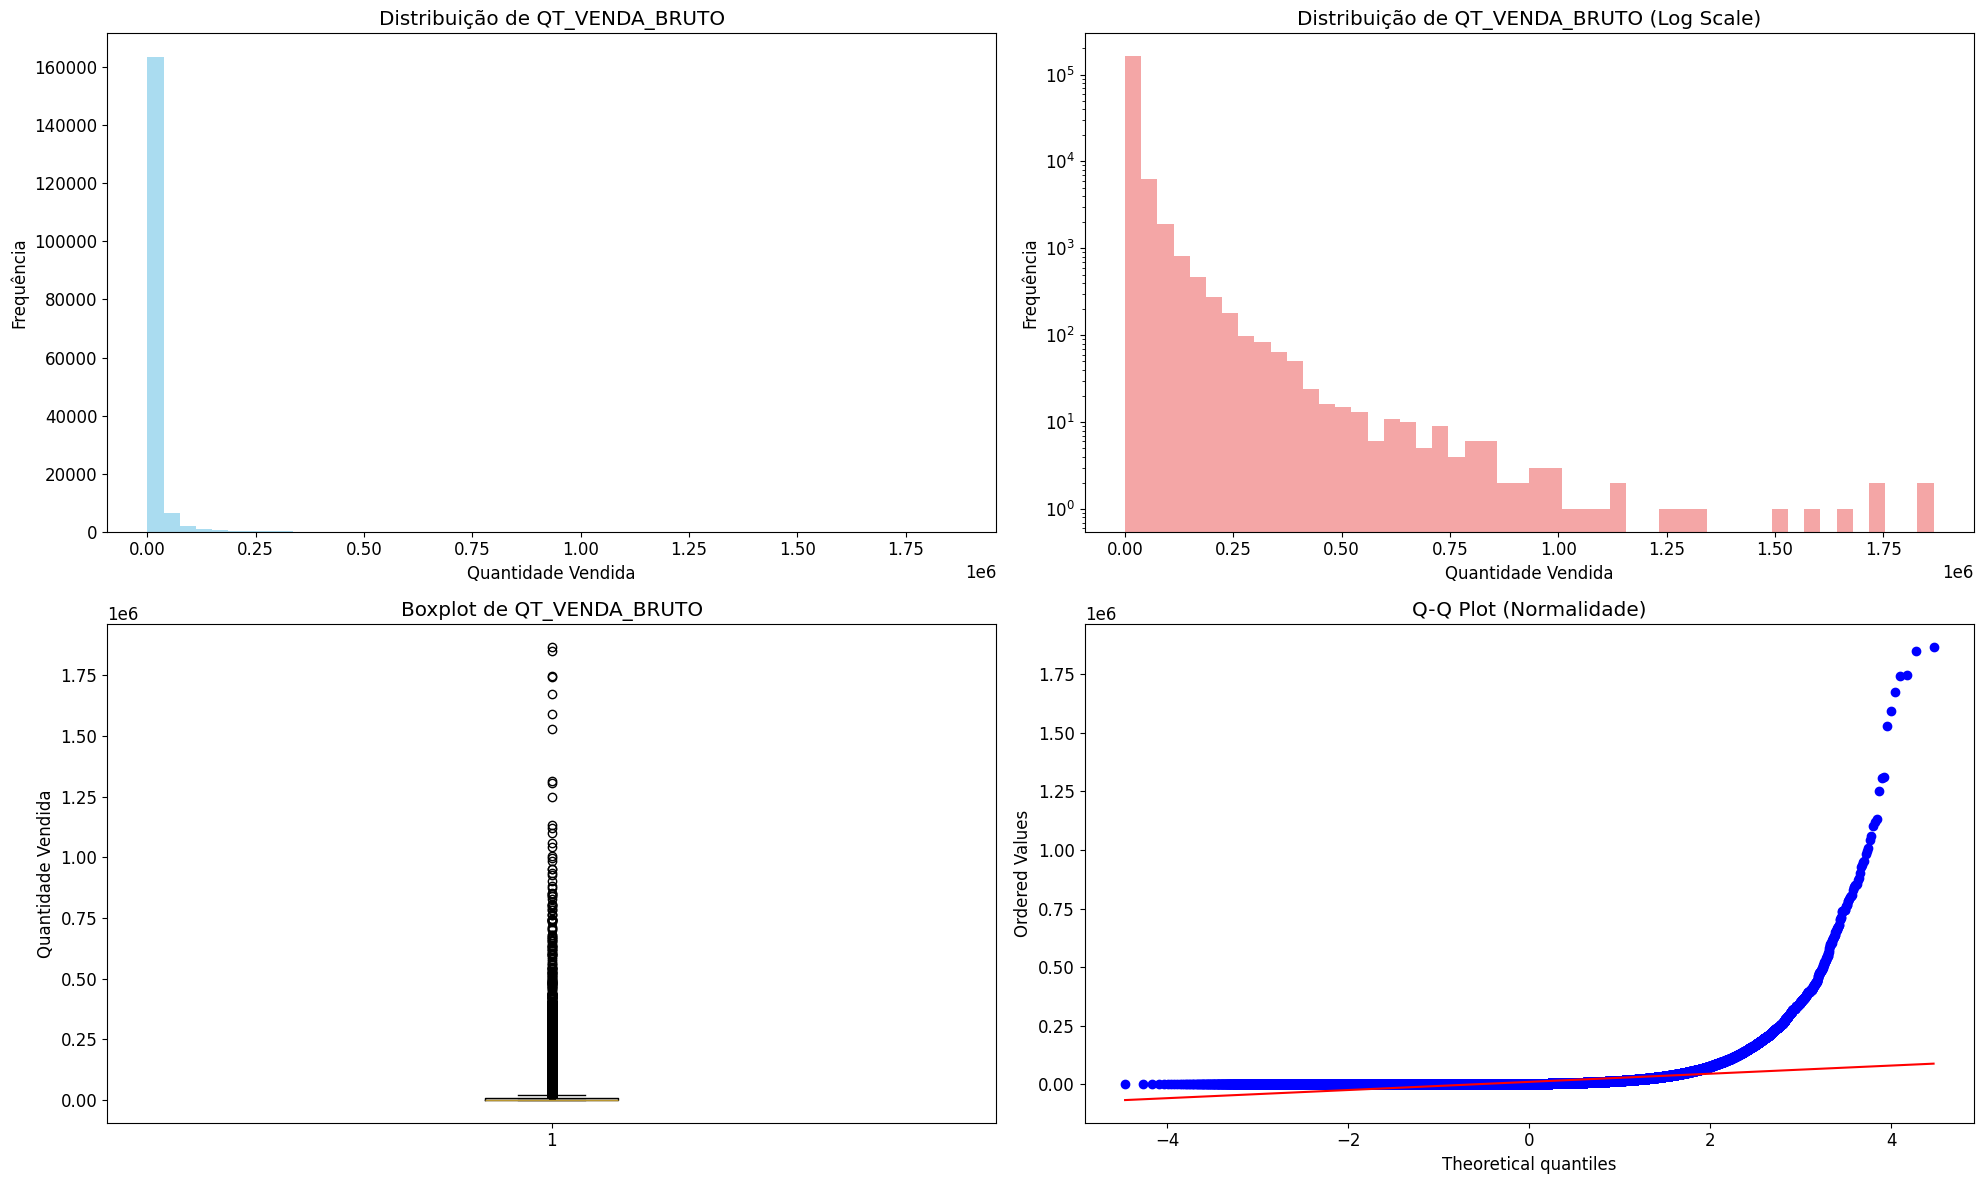


📊 ANÁLISE DE OUTLIERS
Outliers encontrados: 20,136 (11.58%)
Limite inferior: -11961.00
Limite superior: 20991.00


In [9]:
# Visualização da distribuição da variável target
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Histograma
axes[0,0].hist(df[target], bins=50, alpha=0.7, color='skyblue')
axes[0,0].set_title('Distribuição de QT_VENDA_BRUTO')
axes[0,0].set_xlabel('Quantidade Vendida')
axes[0,0].set_ylabel('Frequência')

# Histograma em escala log
axes[0,1].hist(df[target], bins=50, alpha=0.7, color='lightcoral')
axes[0,1].set_title('Distribuição de QT_VENDA_BRUTO (Log Scale)')
axes[0,1].set_xlabel('Quantidade Vendida')
axes[0,1].set_ylabel('Frequência')
axes[0,1].set_yscale('log')

# Boxplot
axes[1,0].boxplot(df[target])
axes[1,0].set_title('Boxplot de QT_VENDA_BRUTO')
axes[1,0].set_ylabel('Quantidade Vendida')

# Q-Q plot
stats.probplot(df[target], dist="norm", plot=axes[1,1])
axes[1,1].set_title('Q-Q Plot (Normalidade)')

plt.tight_layout()
plt.show()

# Análise de outliers
Q1 = df[target].quantile(0.25)
Q3 = df[target].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[target] < lower_bound) | (df[target] > upper_bound)]
print(f"\n📊 ANÁLISE DE OUTLIERS")
print(f"Outliers encontrados: {len(outliers):,} ({len(outliers)/len(df)*100:.2f}%)")
print(f"Limite inferior: {lower_bound:.2f}")
print(f"Limite superior: {upper_bound:.2f}")

## 3. ⏰ Análise Temporal dos Ciclos

In [10]:
# Função para extrair ano e período do ciclo
def parse_ciclo(ciclo):
    ciclo_str = str(ciclo)
    ano = int(ciclo_str[:4])
    periodo = int(ciclo_str[4:])
    return ano, periodo

# Criando variáveis temporais
df['ANO'] = df['COD_CICLO'].apply(lambda x: parse_ciclo(x)[0])
df['PERIODO'] = df['COD_CICLO'].apply(lambda x: parse_ciclo(x)[1])

print("📅 ANÁLISE TEMPORAL DOS CICLOS")
print("=" * 50)
print(f"Anos únicos: {sorted(df['ANO'].unique())}")
print(f"Períodos únicos: {sorted(df['PERIODO'].unique())}")
print(f"Total de ciclos: {df['COD_CICLO'].nunique()}")

📅 ANÁLISE TEMPORAL DOS CICLOS
Anos únicos: [np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021)]
Períodos únicos: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18)]
Total de ciclos: 53


In [11]:
# Agregação de vendas por ciclo para análise temporal
vendas_por_ciclo = df.groupby('COD_CICLO')['QT_VENDA_BRUTO'].agg(['sum', 'mean', 'count']).reset_index()
vendas_por_ciclo = vendas_por_ciclo.sort_values('COD_CICLO')

print("📈 Vendas por ciclo (primeiros 10):")
print(vendas_por_ciclo.head(10))

📈 Vendas por ciclo (primeiros 10):
   COD_CICLO           sum          mean  count
0     201801  4.324836e+07  13456.242219   3214
1     201802  4.483645e+07  14099.511321   3180
2     201803  2.285252e+07   7666.057699   2981
3     201804  2.989030e+07   9884.359127   3024
4     201805  1.857857e+07   6336.484993   2932
5     201806  2.445681e+07   8082.225050   3026
6     201807  2.981523e+07   9749.910392   3058
7     201808  1.817576e+07   6022.451953   3018
8     201809  2.312045e+07   7501.767589   3082
9     201810  2.706136e+07   8852.259731   3057


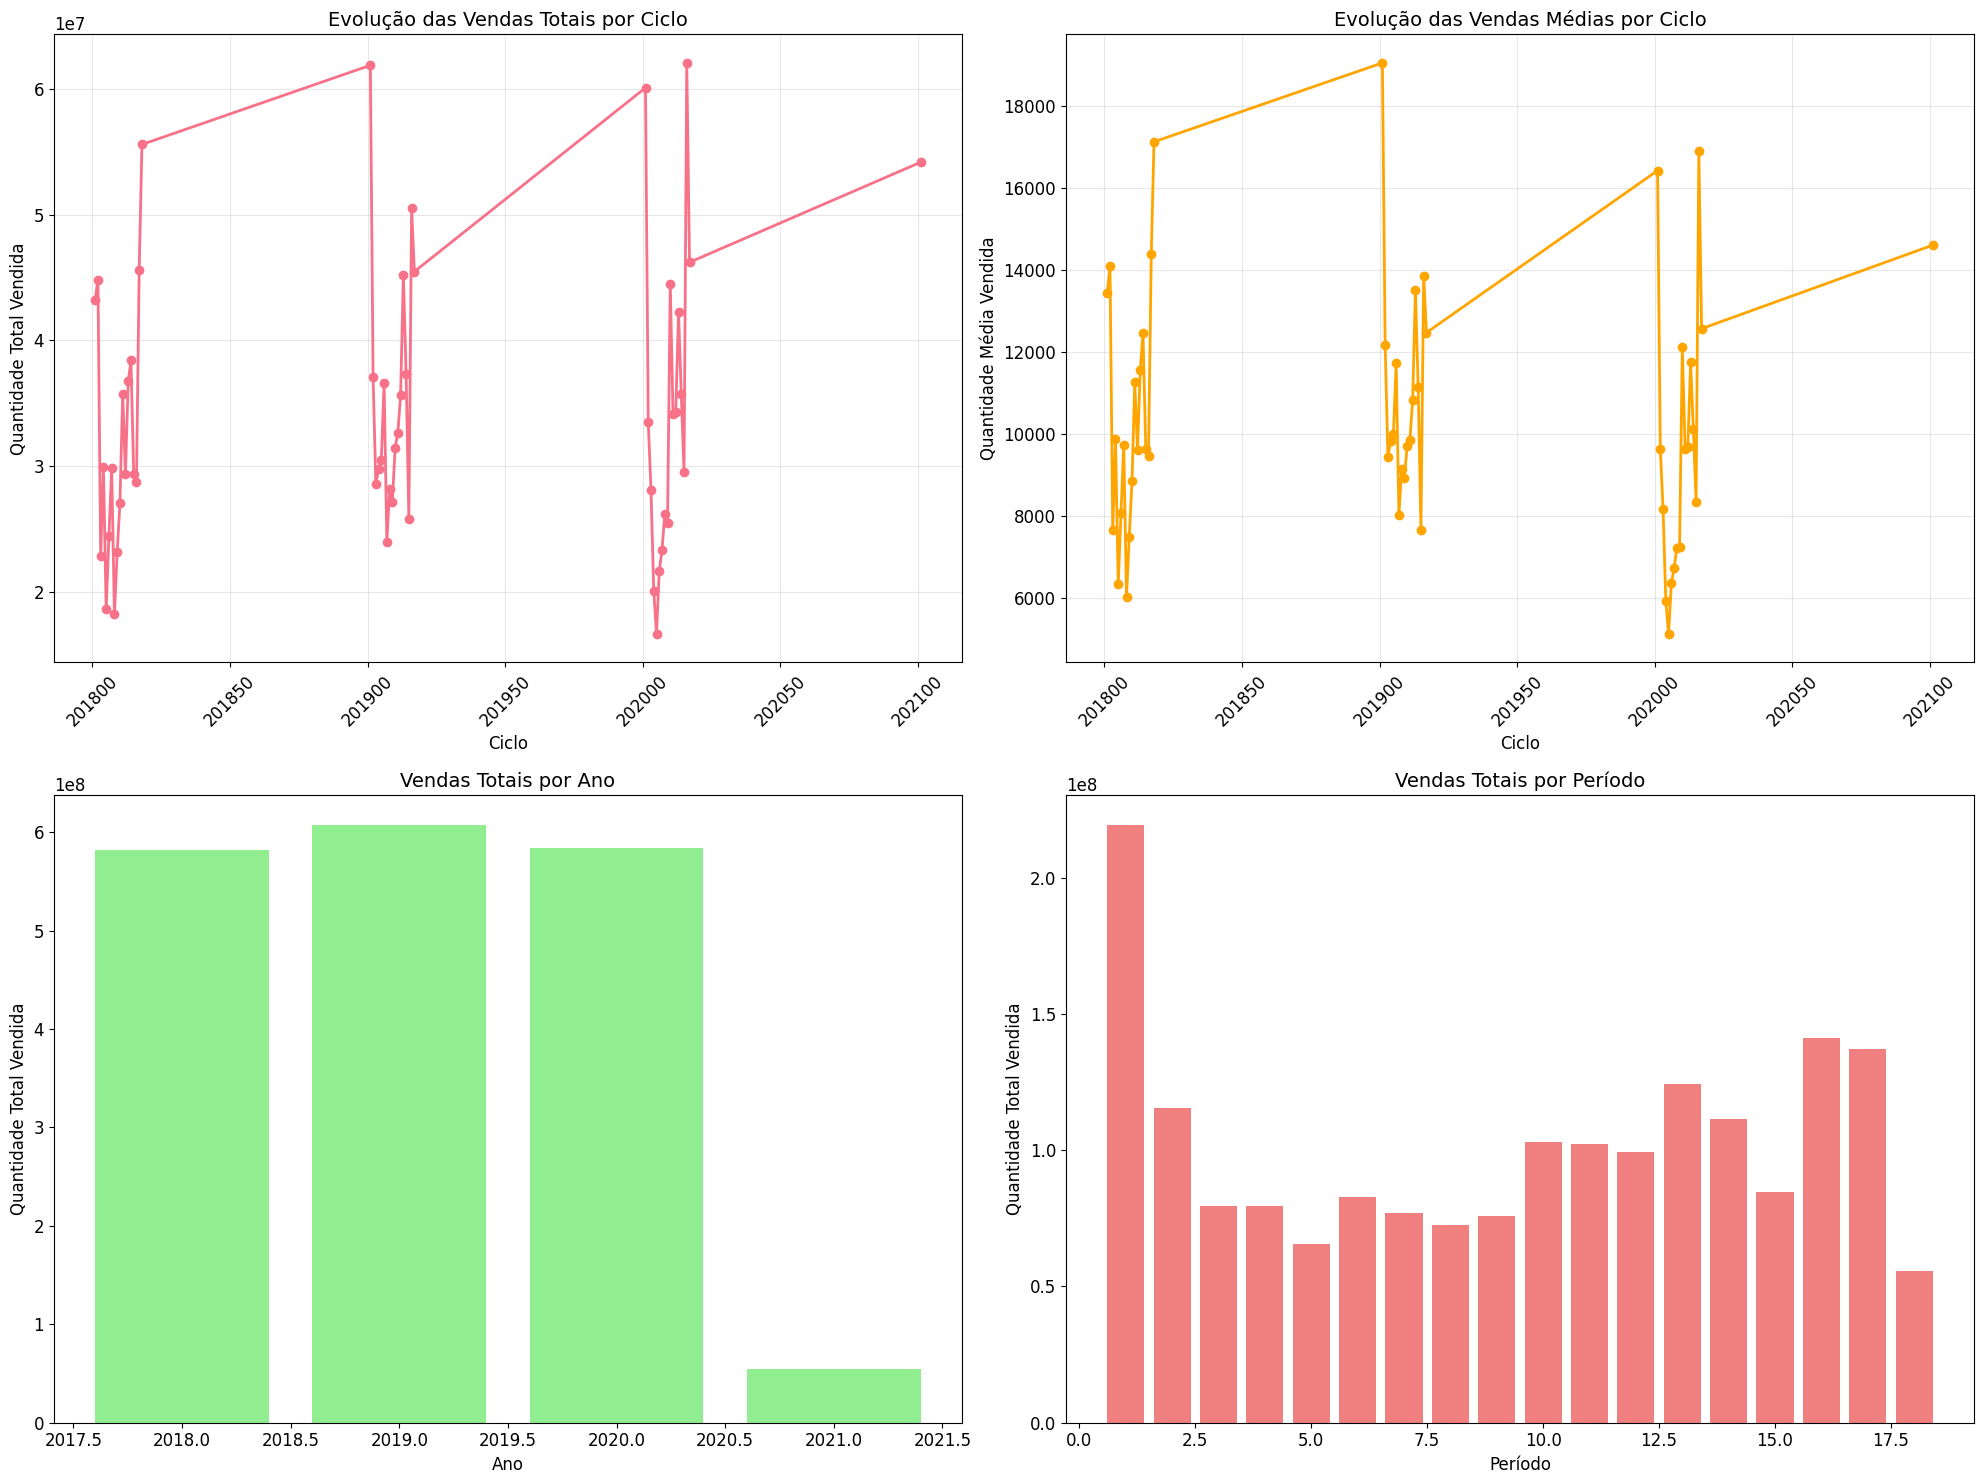

In [12]:
# Visualização da evolução temporal
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Vendas totais por ciclo
axes[0,0].plot(vendas_por_ciclo['COD_CICLO'], vendas_por_ciclo['sum'], marker='o', linewidth=2)
axes[0,0].set_title('Evolução das Vendas Totais por Ciclo', fontsize=14)
axes[0,0].set_xlabel('Ciclo')
axes[0,0].set_ylabel('Quantidade Total Vendida')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(True, alpha=0.3)

# Vendas médias por ciclo
axes[0,1].plot(vendas_por_ciclo['COD_CICLO'], vendas_por_ciclo['mean'], marker='o', color='orange', linewidth=2)
axes[0,1].set_title('Evolução das Vendas Médias por Ciclo', fontsize=14)
axes[0,1].set_xlabel('Ciclo')
axes[0,1].set_ylabel('Quantidade Média Vendida')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].grid(True, alpha=0.3)

# Vendas por ano
vendas_por_ano = df.groupby('ANO')['QT_VENDA_BRUTO'].sum()
axes[1,0].bar(vendas_por_ano.index, vendas_por_ano.values, color='lightgreen')
axes[1,0].set_title('Vendas Totais por Ano', fontsize=14)
axes[1,0].set_xlabel('Ano')
axes[1,0].set_ylabel('Quantidade Total Vendida')

# Vendas por período
vendas_por_periodo = df.groupby('PERIODO')['QT_VENDA_BRUTO'].sum()
axes[1,1].bar(vendas_por_periodo.index, vendas_por_periodo.values, color='lightcoral')
axes[1,1].set_title('Vendas Totais por Período', fontsize=14)
axes[1,1].set_xlabel('Período')
axes[1,1].set_ylabel('Quantidade Total Vendida')

plt.tight_layout()
plt.show()

## 4. 🔍 Teste de Estacionariedade e Sazonalidade

In [13]:
# Função para teste de estacionariedade
def test_stationarity(timeseries, title):
    print(f'\n📊 Teste de Estacionariedade: {title}')
    print('=' * 50)
    
    # Teste ADF
    result = adfuller(timeseries.dropna())
    print('🔍 Teste Augmented Dickey-Fuller:')
    print(f'   Estatística ADF: {result[0]:.6f}')
    print(f'   p-valor: {result[1]:.6f}')
    print('   Valores críticos:')
    for key, value in result[4].items():
        print(f'     {key}: {value:.3f}')
    
    if result[1] <= 0.05:
        print("   ✅ Resultado: Série é estacionária (rejeita H0)")
    else:
        print("   ❌ Resultado: Série é não-estacionária (não rejeita H0)")
    
    # Teste KPSS
    try:
        kpss_stat, kpss_p, kpss_lags, kpss_crit = kpss(timeseries.dropna())
        print(f'\n🔍 Teste KPSS:')
        print(f'   Estatística KPSS: {kpss_stat:.6f}')
        print(f'   p-valor: {kpss_p:.6f}')
        if kpss_p >= 0.05:
            print("   ✅ Resultado KPSS: Série é estacionária")
        else:
            print("   ❌ Resultado KPSS: Série é não-estacionária")
    except:
        print("   ⚠️ Não foi possível executar o teste KPSS")

# Testando estacionariedade das vendas agregadas
vendas_ts = vendas_por_ciclo.set_index('COD_CICLO')['sum']
test_stationarity(vendas_ts, 'Vendas Totais por Ciclo')


📊 Teste de Estacionariedade: Vendas Totais por Ciclo
🔍 Teste Augmented Dickey-Fuller:
   Estatística ADF: -3.931194
   p-valor: 0.001817
   Valores críticos:
     1%: -3.563
     5%: -2.919
     10%: -2.597
   ✅ Resultado: Série é estacionária (rejeita H0)

🔍 Teste KPSS:
   Estatística KPSS: 0.141918
   p-valor: 0.100000
   ✅ Resultado KPSS: Série é estacionária


🔄 DECOMPOSIÇÃO SAZONAL


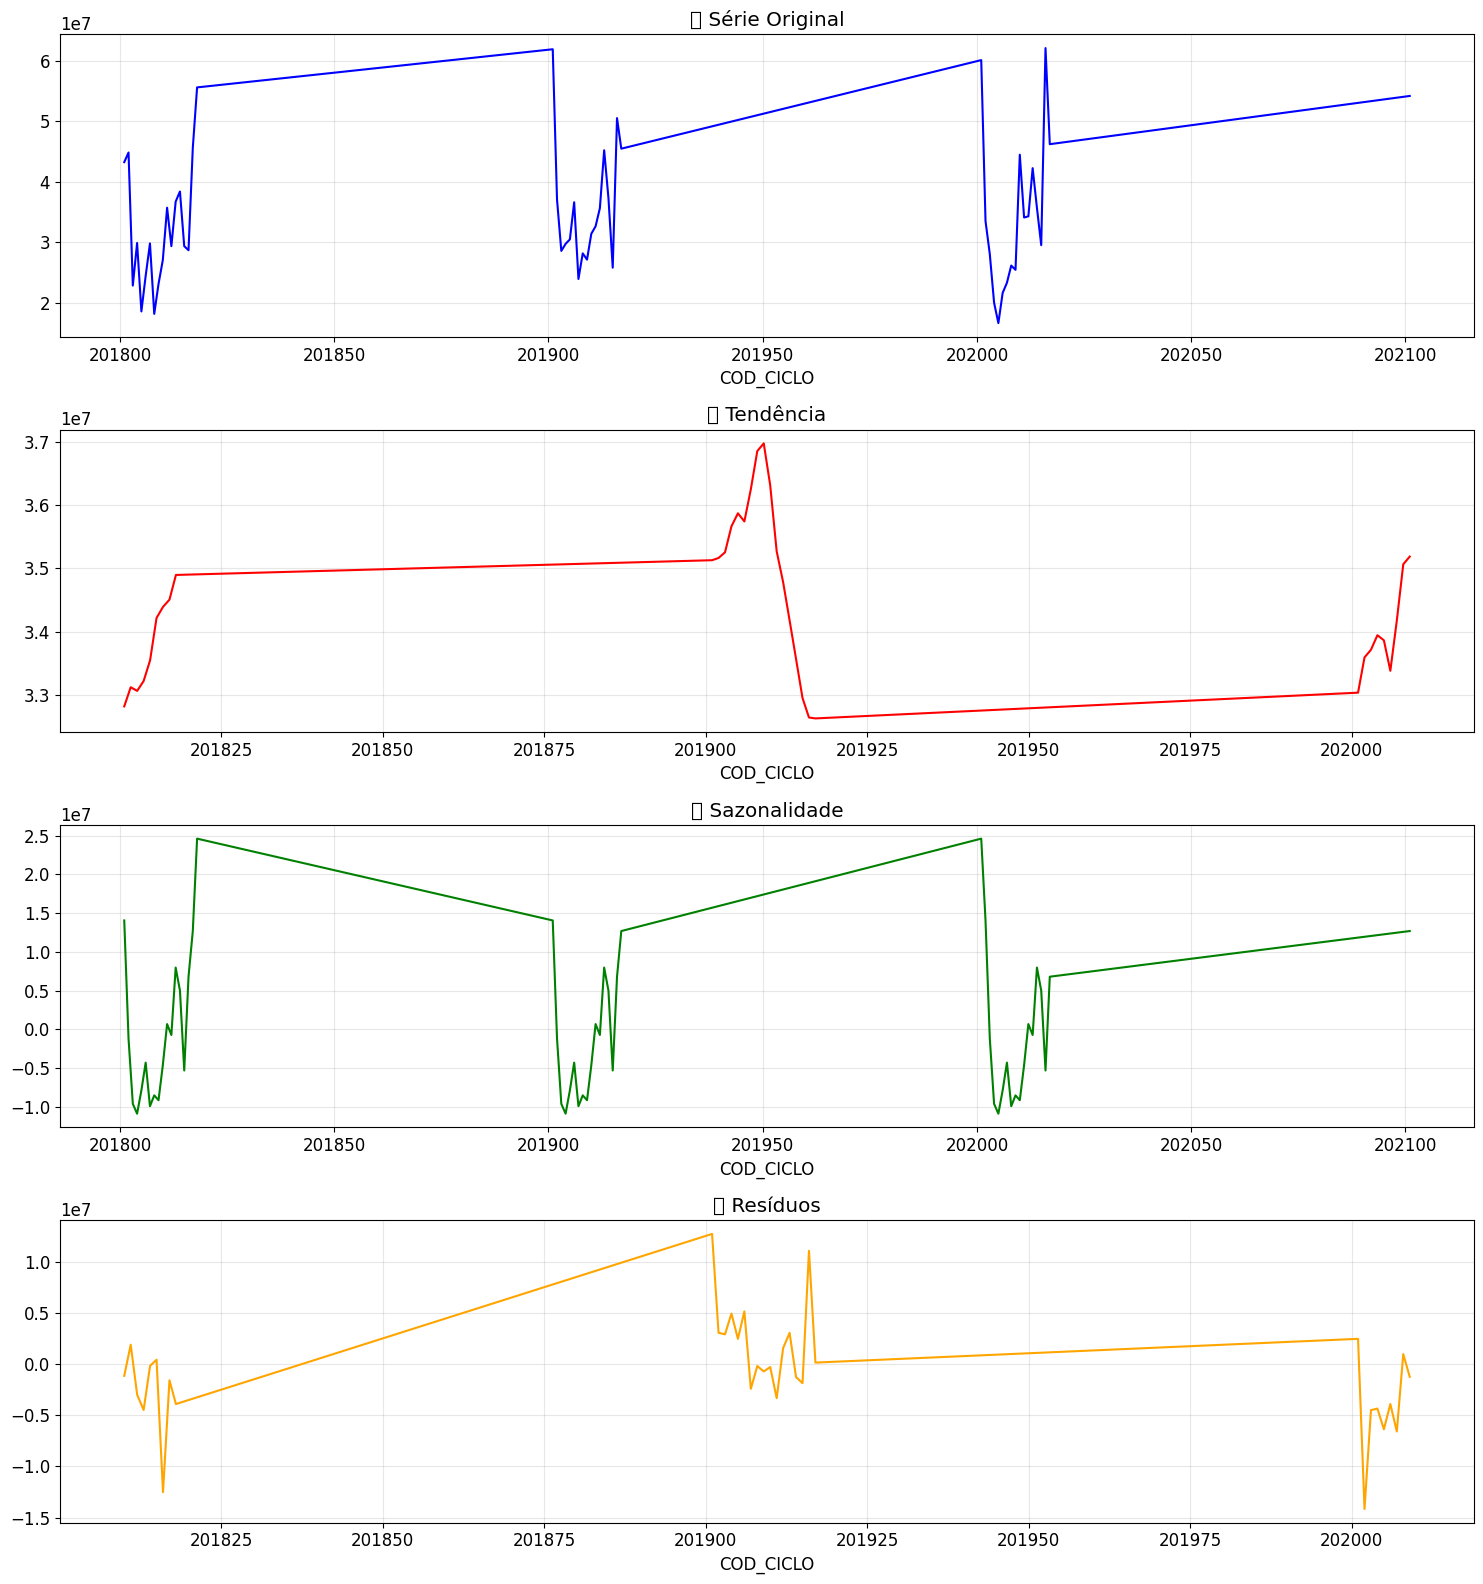

✅ Decomposição sazonal concluída!

📊 Teste de Estacionariedade: Resíduos da Decomposição
🔍 Teste Augmented Dickey-Fuller:
   Estatística ADF: -2.904226
   p-valor: 0.044859
   Valores críticos:
     1%: -3.646
     5%: -2.954
     10%: -2.616
   ✅ Resultado: Série é estacionária (rejeita H0)

🔍 Teste KPSS:
   Estatística KPSS: 0.184456
   p-valor: 0.100000
   ✅ Resultado KPSS: Série é estacionária


In [14]:
# Decomposição sazonal
print("🔄 DECOMPOSIÇÃO SAZONAL")
print("=" * 50)

try:
    # Decomposição com período de 18 (baseado na análise dos dados)
    decomposition = seasonal_decompose(vendas_ts, model='additive', period=18)
    
    # Plotando decomposição
    fig, axes = plt.subplots(4, 1, figsize=(15, 16))
    
    decomposition.observed.plot(ax=axes[0], title='📈 Série Original', color='blue')
    axes[0].grid(True, alpha=0.3)
    
    decomposition.trend.plot(ax=axes[1], title='📊 Tendência', color='red')
    axes[1].grid(True, alpha=0.3)
    
    decomposition.seasonal.plot(ax=axes[2], title='🔄 Sazonalidade', color='green')
    axes[2].grid(True, alpha=0.3)
    
    decomposition.resid.plot(ax=axes[3], title='🎲 Resíduos', color='orange')
    axes[3].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Decomposição sazonal concluída!")
    
    # Testando estacionariedade dos resíduos
    residuos = decomposition.resid.dropna()
    test_stationarity(residuos, 'Resíduos da Decomposição')
    
except Exception as e:
    print(f"❌ Erro na decomposição sazonal: {e}")

## 5. 🎉 Análise de Datas Comemorativas

In [15]:
# Análise do impacto de datas comemorativas
print("🎉 ANÁLISE DE DATAS COMEMORATIVAS")
print("=" * 50)

vendas_comemorativas = df.groupby('FLG_DATA')['QT_VENDA_BRUTO'].agg(['sum', 'mean', 'count', 'std']).reset_index()
vendas_comemorativas['FLG_DATA'] = vendas_comemorativas['FLG_DATA'].map({0: 'Normal', 1: 'Comemorativa'})

print("📊 Estatísticas por tipo de data:")
print(vendas_comemorativas)

# Teste estatístico para diferença
vendas_normal = df[df['FLG_DATA'] == 0]['QT_VENDA_BRUTO']
vendas_comemorativa = df[df['FLG_DATA'] == 1]['QT_VENDA_BRUTO']

stat, p_value = stats.mannwhitneyu(vendas_normal, vendas_comemorativa, alternative='two-sided')
print(f"\n🧪 Teste Mann-Whitney U:")
print(f"   Estatística: {stat:.2f}")
print(f"   p-valor: {p_value:.6f}")
if p_value < 0.05:
    print("   ✅ Diferença estatisticamente significativa!")
else:
    print("   ❌ Diferença não significativa")

🎉 ANÁLISE DE DATAS COMEMORATIVAS
📊 Estatísticas por tipo de data:
       FLG_DATA           sum          mean   count           std
0        Normal  1.259712e+09  10190.109503  123621  33284.090466
1  Comemorativa  5.671348e+08  11274.597520   50302  33242.172848

🧪 Teste Mann-Whitney U:
   Estatística: 3004889885.00
   p-valor: 0.000000
   ✅ Diferença estatisticamente significativa!


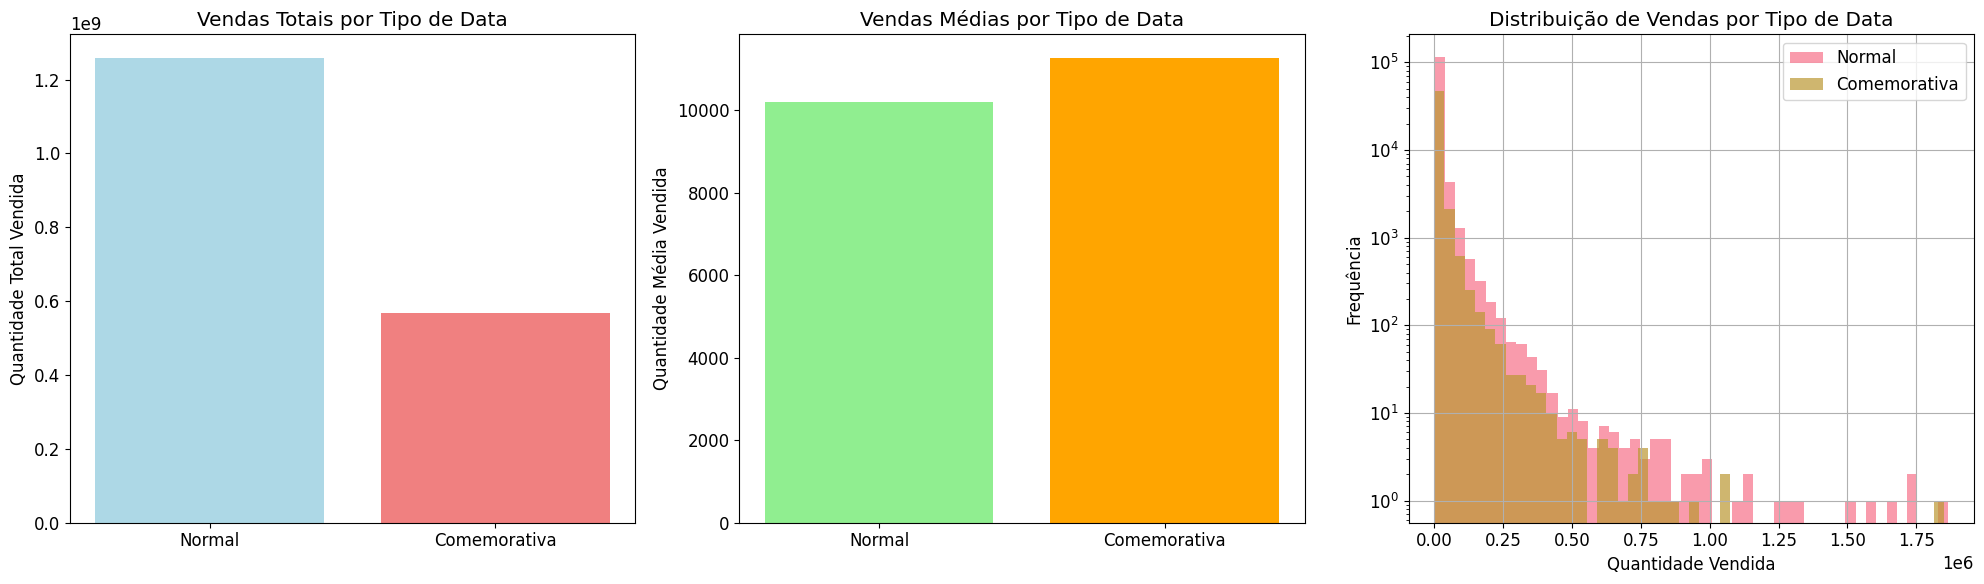

In [16]:
# Visualização do impacto de datas comemorativas
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Vendas totais
vendas_total = df.groupby('FLG_DATA')['QT_VENDA_BRUTO'].sum()
labels = ['Normal', 'Comemorativa']
axes[0].bar(labels, vendas_total.values, color=['lightblue', 'lightcoral'])
axes[0].set_title('Vendas Totais por Tipo de Data')
axes[0].set_ylabel('Quantidade Total Vendida')

# Vendas médias
vendas_media = df.groupby('FLG_DATA')['QT_VENDA_BRUTO'].mean()
axes[1].bar(labels, vendas_media.values, color=['lightgreen', 'orange'])
axes[1].set_title('Vendas Médias por Tipo de Data')
axes[1].set_ylabel('Quantidade Média Vendida')

# Distribuição
df[df['FLG_DATA'] == 0]['QT_VENDA_BRUTO'].hist(bins=50, alpha=0.7, label='Normal', ax=axes[2])
df[df['FLG_DATA'] == 1]['QT_VENDA_BRUTO'].hist(bins=50, alpha=0.7, label='Comemorativa', ax=axes[2])
axes[2].set_title('Distribuição de Vendas por Tipo de Data')
axes[2].set_xlabel('Quantidade Vendida')
axes[2].set_ylabel('Frequência')
axes[2].legend()
axes[2].set_yscale('log')

plt.tight_layout()
plt.show()

## 6. 📢 Análise de Campanhas de Marketing

In [17]:
# Análise das campanhas de marketing
print("📢 ANÁLISE DAS CAMPANHAS DE MARKETING")
print("=" * 50)

campanhas = ['FLG_CAMPANHA_MKT_A', 'FLG_CAMPANHA_MKT_B', 'FLG_CAMPANHA_MKT_C', 'FLG_CAMPANHA_MKT_D', 'FLG_CAMPANHA_MKT_E']

# Estatísticas por campanha
campanha_stats = []
for campanha in campanhas:
    if campanha in df.columns:
        total_registros = df[campanha].sum()
        percentual = (total_registros / len(df)) * 100
        
        if total_registros > 0:
            vendas_com = df[df[campanha] == 1]['QT_VENDA_BRUTO'].mean()
            vendas_sem = df[df[campanha] == 0]['QT_VENDA_BRUTO'].mean()
            impacto = ((vendas_com - vendas_sem) / vendas_sem) * 100
        else:
            vendas_com = 0
            vendas_sem = df['QT_VENDA_BRUTO'].mean()
            impacto = 0
        
        campanha_stats.append({
            'Campanha': campanha.replace('FLG_CAMPANHA_MKT_', ''),
            'Registros_Ativos': total_registros,
            'Percentual': percentual,
            'Venda_Media_Com': vendas_com,
            'Venda_Media_Sem': vendas_sem,
            'Impacto_Percentual': impacto
        })

campanha_df = pd.DataFrame(campanha_stats)
print("📊 Estatísticas das campanhas:")
print(campanha_df.round(2))

📢 ANÁLISE DAS CAMPANHAS DE MARKETING
📊 Estatísticas das campanhas:
  Campanha  Registros_Ativos  Percentual  Venda_Media_Com  Venda_Media_Sem  \
0        A              2949        1.70         34422.16         10091.21   
1        B             48592       27.94         23542.77          5448.42   
2        C              7986        4.59         36073.94          9273.16   
3        D             12693        7.30         24594.97          9394.42   
4        E                 0        0.00             0.00         10503.77   

   Impacto_Percentual  
0              241.11  
1              332.10  
2              289.01  
3              161.80  
4                0.00  


In [18]:
# Testes estatísticos para cada campanha
print("\n🧪 TESTES ESTATÍSTICOS POR CAMPANHA")
print("=" * 50)

for campanha in campanhas:
    if campanha in df.columns and df[campanha].sum() > 0:
        vendas_sem_campanha = df[df[campanha] == 0]['QT_VENDA_BRUTO']
        vendas_com_campanha = df[df[campanha] == 1]['QT_VENDA_BRUTO']
        
        if len(vendas_com_campanha) > 0:
            stat, p_value = stats.mannwhitneyu(vendas_sem_campanha, vendas_com_campanha, alternative='two-sided')
            print(f"\n📢 {campanha}:")
            print(f"   Registros ativos: {len(vendas_com_campanha):,}")
            print(f"   Teste Mann-Whitney U: estatística={stat:.2f}, p-valor={p_value:.6f}")
            if p_value < 0.05:
                print("   ✅ Impacto estatisticamente significativo!")
            else:
                print("   ❌ Impacto não significativo")


🧪 TESTES ESTATÍSTICOS POR CAMPANHA

📢 FLG_CAMPANHA_MKT_A:
   Registros ativos: 2,949
   Teste Mann-Whitney U: estatística=169787375.50, p-valor=0.000000
   ✅ Impacto estatisticamente significativo!

📢 FLG_CAMPANHA_MKT_B:
   Registros ativos: 48,592
   Teste Mann-Whitney U: estatística=1218595294.00, p-valor=0.000000
   ✅ Impacto estatisticamente significativo!

📢 FLG_CAMPANHA_MKT_C:
   Registros ativos: 7,986
   Teste Mann-Whitney U: estatística=306185797.00, p-valor=0.000000
   ✅ Impacto estatisticamente significativo!

📢 FLG_CAMPANHA_MKT_D:
   Registros ativos: 12,693
   Teste Mann-Whitney U: estatística=542858631.50, p-valor=0.000000
   ✅ Impacto estatisticamente significativo!


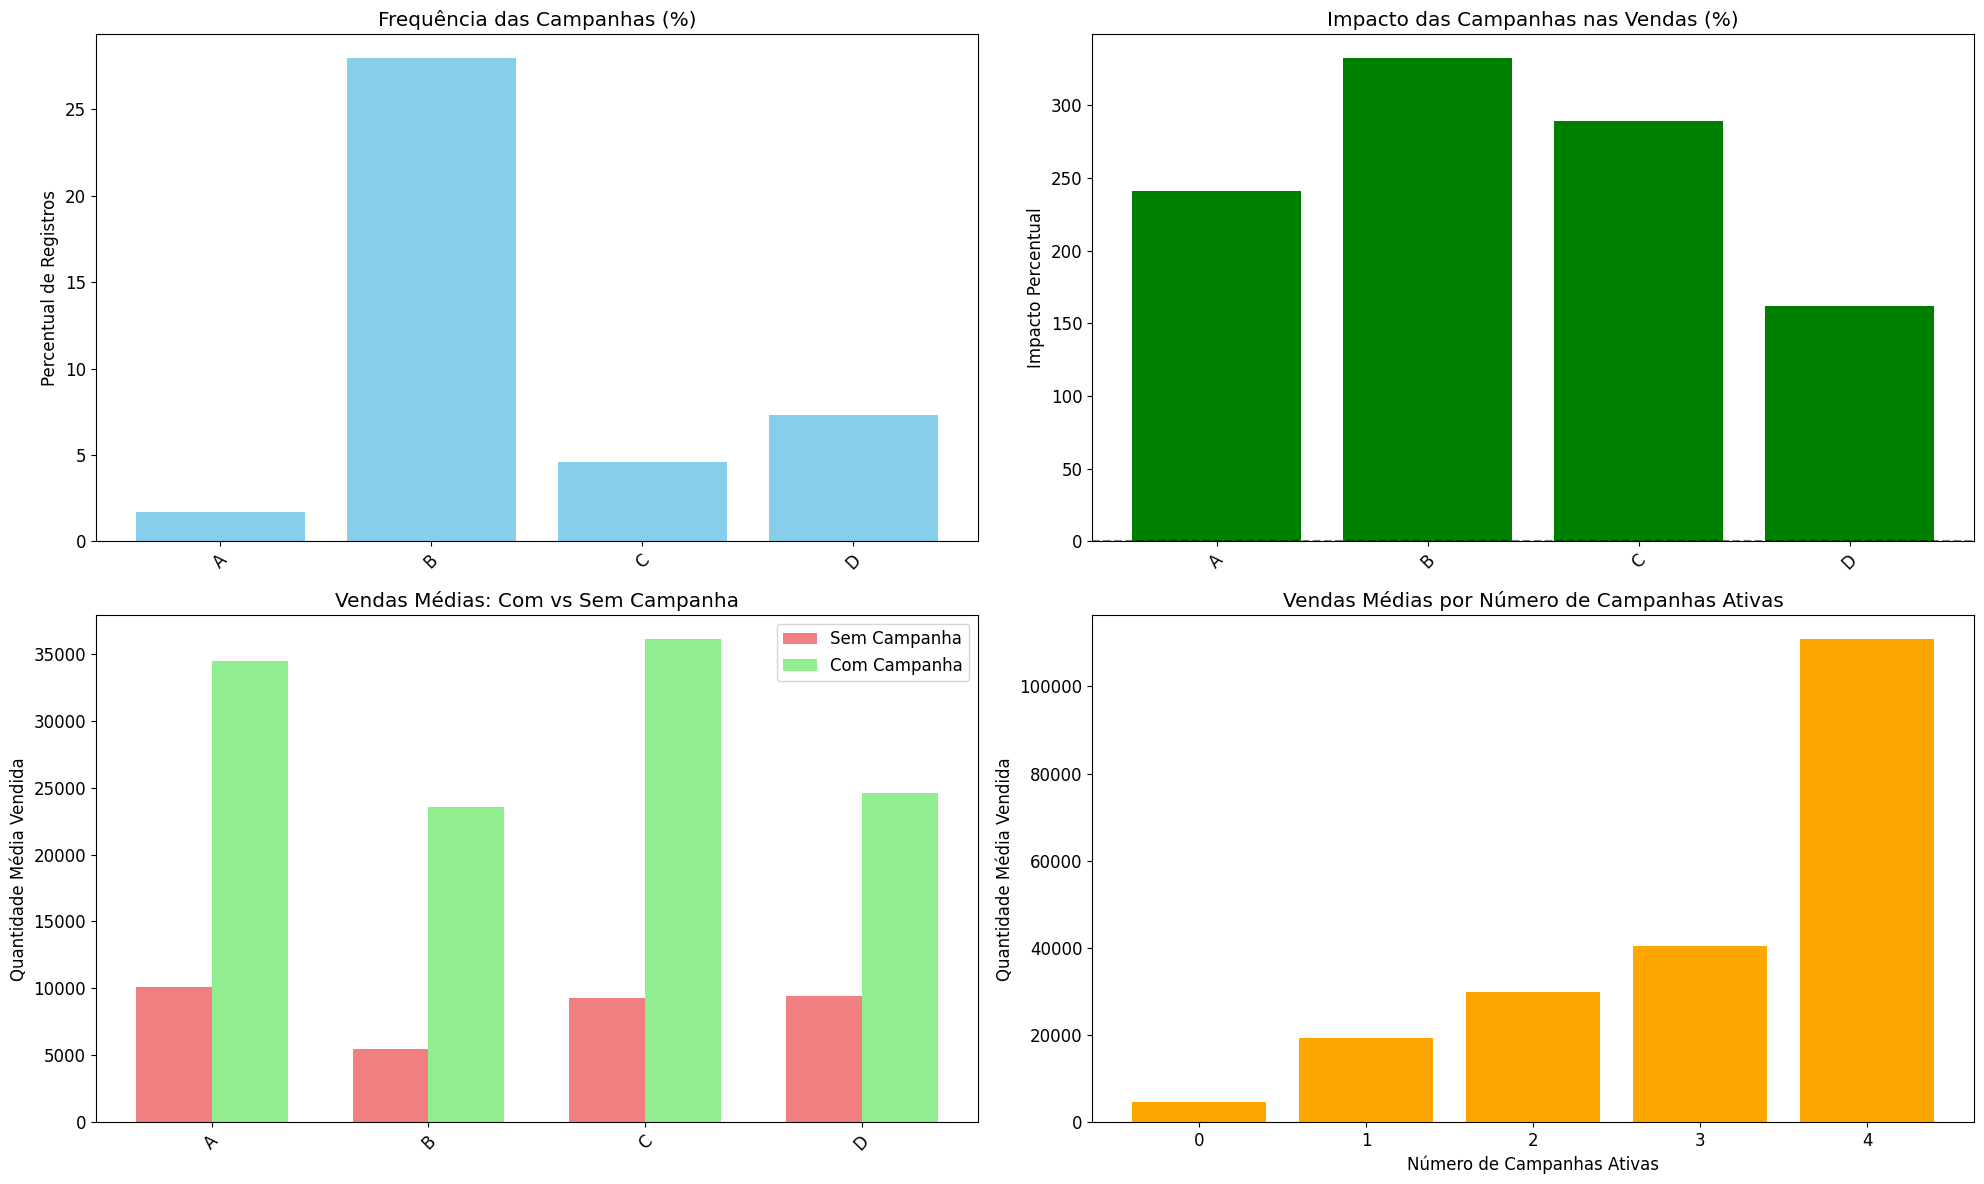

In [19]:
# Visualização do impacto das campanhas
campanhas_ativas = campanha_df[campanha_df['Registros_Ativos'] > 0]

fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Frequência das campanhas
axes[0,0].bar(campanhas_ativas['Campanha'], campanhas_ativas['Percentual'], color='skyblue')
axes[0,0].set_title('Frequência das Campanhas (%)')
axes[0,0].set_ylabel('Percentual de Registros')
axes[0,0].tick_params(axis='x', rotation=45)

# Impacto percentual
colors = ['green' if x > 0 else 'red' for x in campanhas_ativas['Impacto_Percentual']]
axes[0,1].bar(campanhas_ativas['Campanha'], campanhas_ativas['Impacto_Percentual'], color=colors)
axes[0,1].set_title('Impacto das Campanhas nas Vendas (%)')
axes[0,1].set_ylabel('Impacto Percentual')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].axhline(y=0, color='black', linestyle='--', alpha=0.5)

# Vendas médias com vs sem campanha
x = np.arange(len(campanhas_ativas))
width = 0.35
axes[1,0].bar(x - width/2, campanhas_ativas['Venda_Media_Sem'], width, label='Sem Campanha', color='lightcoral')
axes[1,0].bar(x + width/2, campanhas_ativas['Venda_Media_Com'], width, label='Com Campanha', color='lightgreen')
axes[1,0].set_title('Vendas Médias: Com vs Sem Campanha')
axes[1,0].set_ylabel('Quantidade Média Vendida')
axes[1,0].set_xticks(x)
axes[1,0].set_xticklabels(campanhas_ativas['Campanha'])
axes[1,0].legend()
axes[1,0].tick_params(axis='x', rotation=45)

# Combinação de campanhas
df['TOTAL_CAMPANHAS'] = df[campanhas].sum(axis=1)
vendas_por_num_campanhas = df.groupby('TOTAL_CAMPANHAS')['QT_VENDA_BRUTO'].mean()
axes[1,1].bar(vendas_por_num_campanhas.index, vendas_por_num_campanhas.values, color='orange')
axes[1,1].set_title('Vendas Médias por Número de Campanhas Ativas')
axes[1,1].set_xlabel('Número de Campanhas Ativas')
axes[1,1].set_ylabel('Quantidade Média Vendida')

plt.tight_layout()
plt.show()

## 7. 🏪 Análise por Canal, Categoria e Região

In [20]:
# Análise por canal
print("🏪 ANÁLISE POR CANAL")
print("=" * 50)
vendas_canal = df.groupby('COD_CANAL')['QT_VENDA_BRUTO'].agg(['sum', 'mean', 'count', 'std']).reset_index()
print("📊 Vendas por canal:")
print(vendas_canal.round(2))

# Análise por categoria
print("\n📦 ANÁLISE POR CATEGORIA")
print("=" * 50)
vendas_categoria = df.groupby('DES_CATEGORIA_MATERIAL')['QT_VENDA_BRUTO'].agg(['sum', 'mean', 'count', 'std']).reset_index()
vendas_categoria = vendas_categoria.sort_values('sum', ascending=False)
print("📊 Top categorias por volume:")
print(vendas_categoria.head(10).round(2))

# Análise por marca
print("\n🏷️ ANÁLISE POR MARCA")
print("=" * 50)
vendas_marca = df.groupby('DES_MARCA_MATERIAL')['QT_VENDA_BRUTO'].agg(['sum', 'mean', 'count', 'std']).reset_index()
vendas_marca = vendas_marca.sort_values('sum', ascending=False)
print("📊 Top 10 marcas por volume:")
print(vendas_marca.head(10).round(2))

# Análise por região
print("\n🌍 ANÁLISE POR REGIÃO")
print("=" * 50)
vendas_regiao = df.groupby('COD_REGIAO')['QT_VENDA_BRUTO'].agg(['sum', 'mean', 'count', 'std']).reset_index()
print("📊 Vendas por região:")
print(vendas_regiao.round(2))

🏪 ANÁLISE POR CANAL
📊 Vendas por canal:
  COD_CANAL           sum      mean  count       std
0   anon_S0  8.383907e+08   9618.54  87164  23371.58
1   anon_S7  9.884557e+08  11393.12  86759  40857.58

📦 ANÁLISE POR CATEGORIA
📊 Top categorias por volume:
  DES_CATEGORIA_MATERIAL           sum      mean  count       std
1               anon_S12  8.508705e+08  19825.49  42918  51143.33
3                anon_S2  4.325571e+08   9766.03  44292  36052.68
5                anon_S5  3.188046e+08   7205.93  44242  16866.76
0               anon_S11  1.625460e+08   6504.70  24989  12134.03
2               anon_S18  3.951836e+07   3767.60  10489   8055.42
4               anon_S30  2.254978e+07   3224.62   6993   6825.22

🏷️ ANÁLISE POR MARCA
📊 Top 10 marcas por volume:
   DES_MARCA_MATERIAL           sum      mean  count       std
68            anon_S8  2.535205e+08   7182.49  35297  23919.17
10           anon_S24  2.235455e+08   8668.92  25787  18101.45
6            anon_S20  2.084620e+08  18239.74 

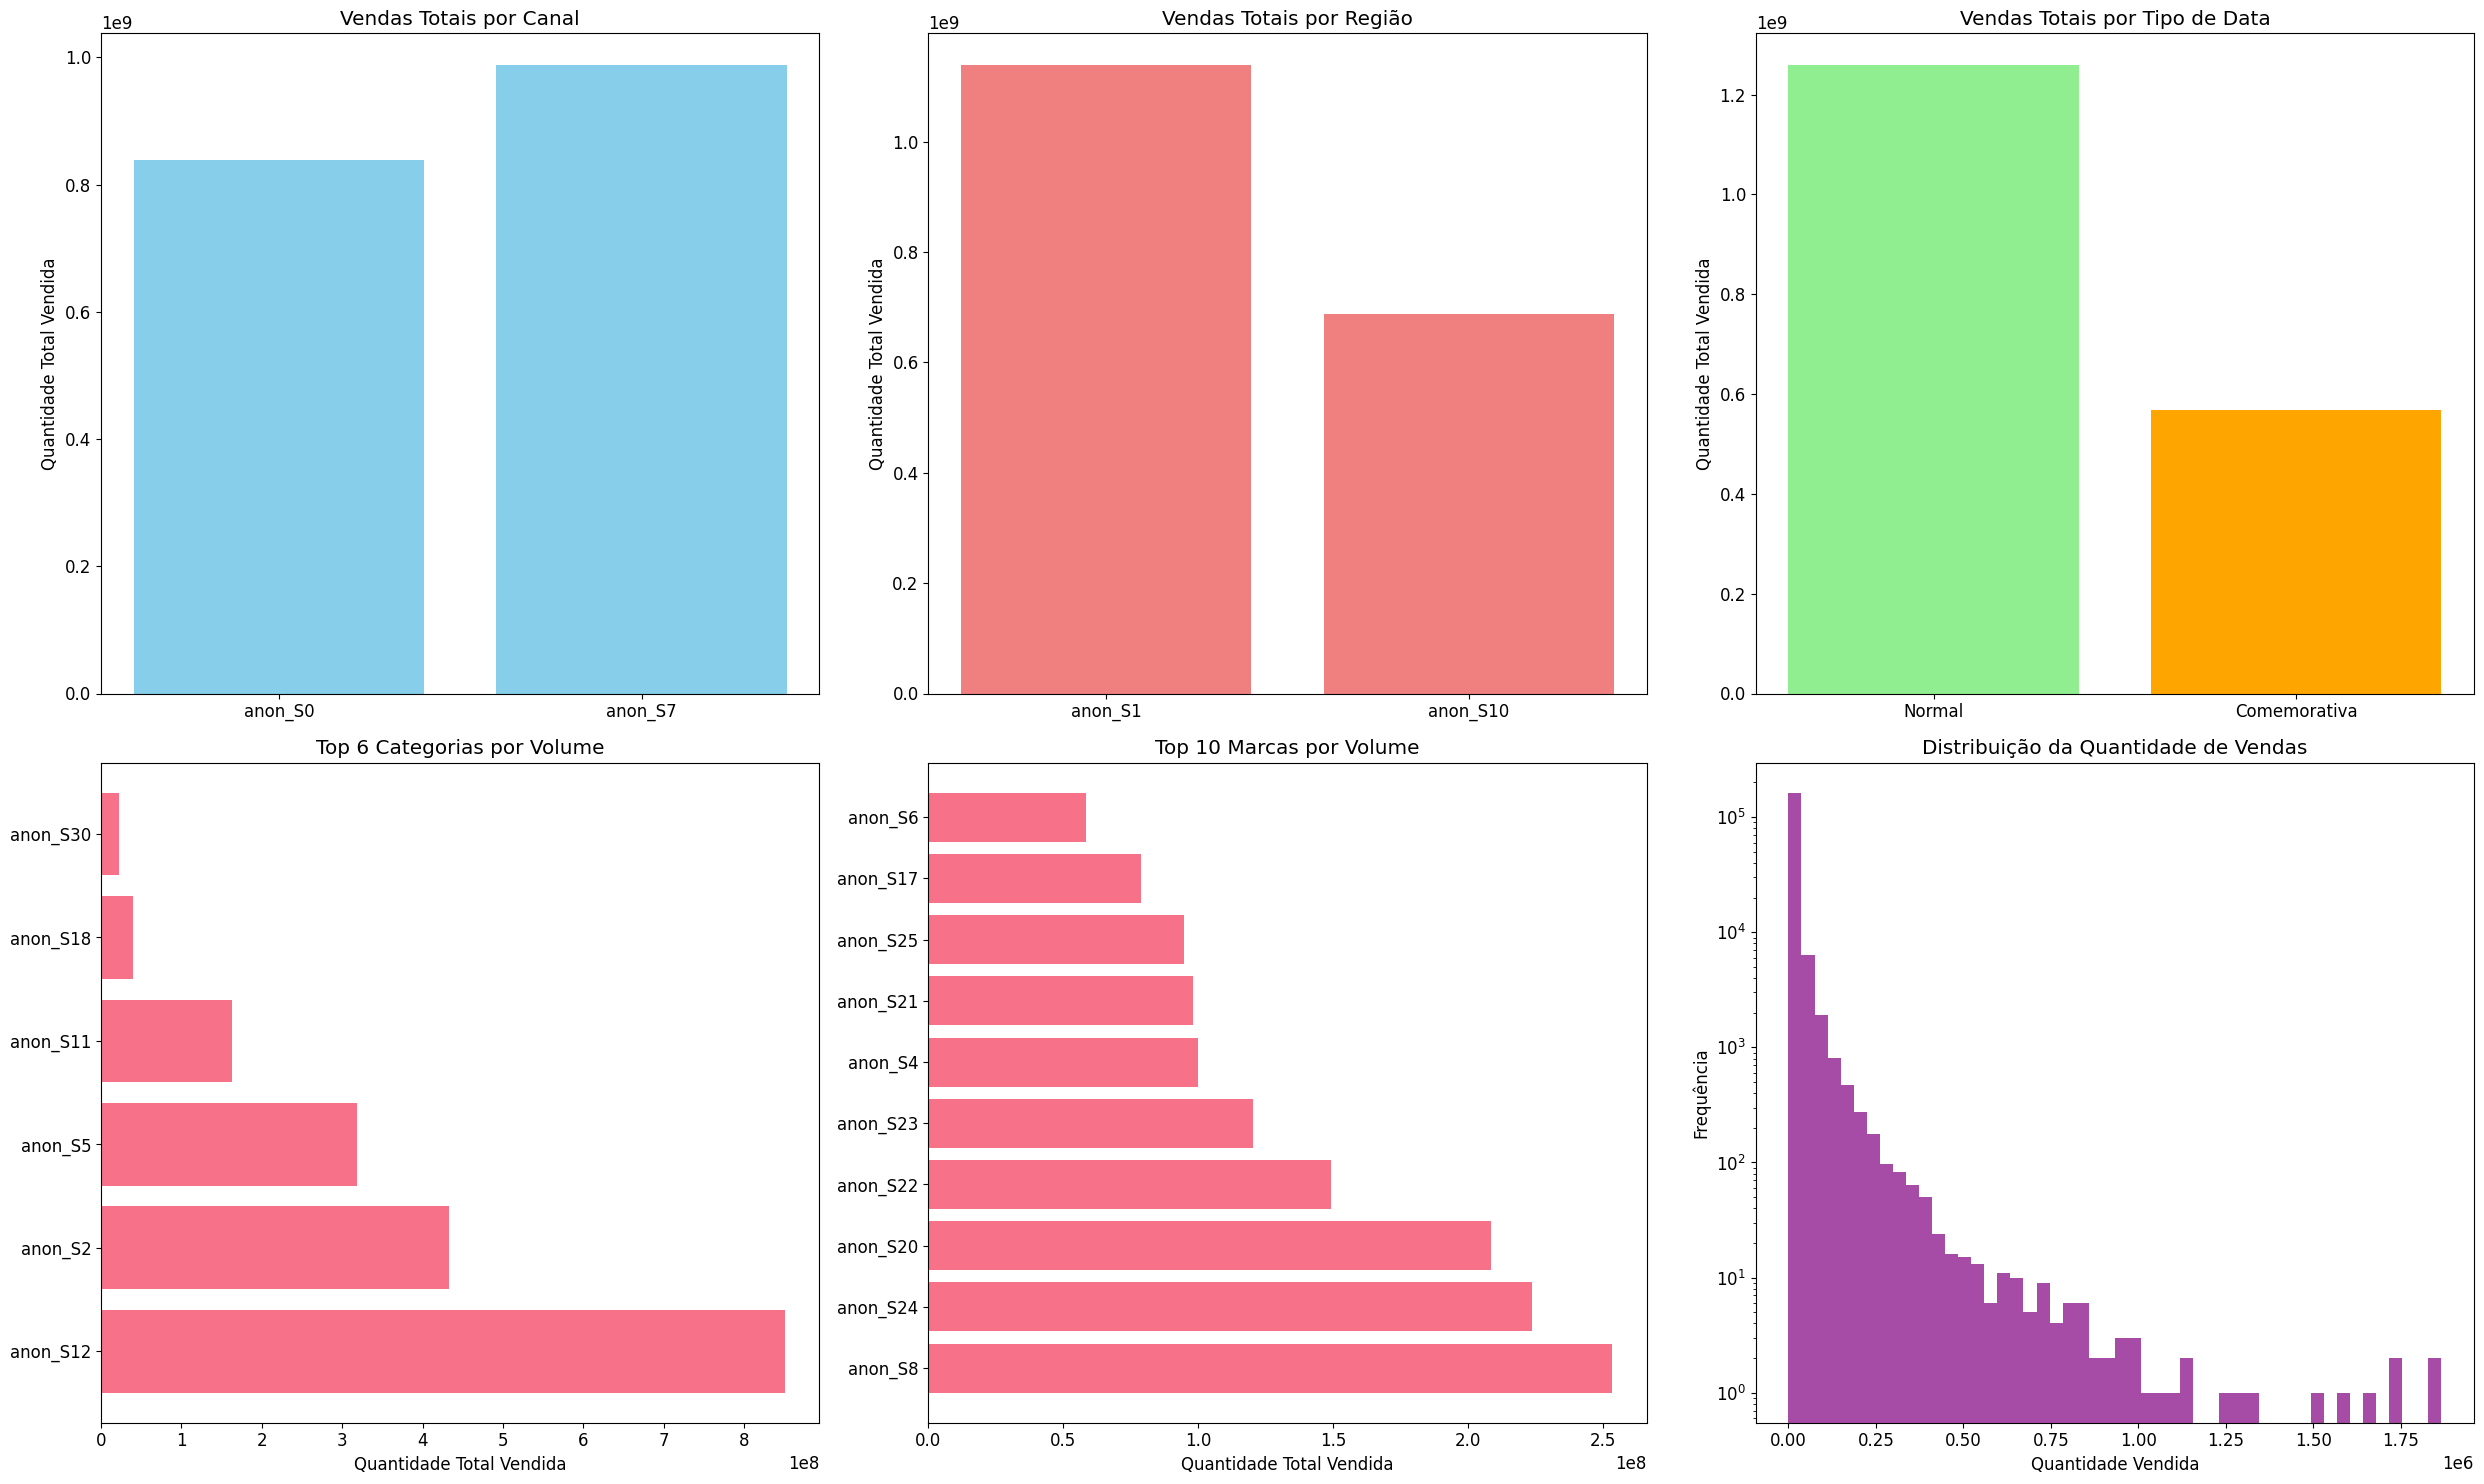

In [21]:
# Visualização das análises categóricas
fig, axes = plt.subplots(2, 3, figsize=(25, 15))

# Canal
vendas_canal_plot = df.groupby('COD_CANAL')['QT_VENDA_BRUTO'].sum()
axes[0,0].bar(vendas_canal_plot.index, vendas_canal_plot.values, color='skyblue')
axes[0,0].set_title('Vendas Totais por Canal')
axes[0,0].set_ylabel('Quantidade Total Vendida')

# Região
vendas_regiao_plot = df.groupby('COD_REGIAO')['QT_VENDA_BRUTO'].sum()
axes[0,1].bar(vendas_regiao_plot.index, vendas_regiao_plot.values, color='lightcoral')
axes[0,1].set_title('Vendas Totais por Região')
axes[0,1].set_ylabel('Quantidade Total Vendida')

# Datas comemorativas
vendas_data_plot = df.groupby('FLG_DATA')['QT_VENDA_BRUTO'].sum()
axes[0,2].bar(['Normal', 'Comemorativa'], vendas_data_plot.values, color=['lightgreen', 'orange'])
axes[0,2].set_title('Vendas Totais por Tipo de Data')
axes[0,2].set_ylabel('Quantidade Total Vendida')

# Top 6 categorias
top_categorias = vendas_categoria.head(6)
axes[1,0].barh(range(len(top_categorias)), top_categorias['sum'])
axes[1,0].set_yticks(range(len(top_categorias)))
axes[1,0].set_yticklabels(top_categorias['DES_CATEGORIA_MATERIAL'])
axes[1,0].set_title('Top 6 Categorias por Volume')
axes[1,0].set_xlabel('Quantidade Total Vendida')

# Top 10 marcas
top_marcas = vendas_marca.head(10)
axes[1,1].barh(range(len(top_marcas)), top_marcas['sum'])
axes[1,1].set_yticks(range(len(top_marcas)))
axes[1,1].set_yticklabels(top_marcas['DES_MARCA_MATERIAL'])
axes[1,1].set_title('Top 10 Marcas por Volume')
axes[1,1].set_xlabel('Quantidade Total Vendida')

# Distribuição da variável target (log scale)
axes[1,2].hist(df['QT_VENDA_BRUTO'], bins=50, alpha=0.7, color='purple')
axes[1,2].set_title('Distribuição da Quantidade de Vendas')
axes[1,2].set_xlabel('Quantidade Vendida')
axes[1,2].set_ylabel('Frequência')
axes[1,2].set_yscale('log')

plt.tight_layout()
plt.show()

## 8. 💰 Análise de Preços, Descontos e Devoluções

In [22]:
# Análise de preços
print("💰 ANÁLISE DE PREÇOS")
print("=" * 50)
print("📊 Estatísticas de preço:")
print(df['VL_PRECO'].describe())

# Análise de descontos
print("\n🏷️ ANÁLISE DE DESCONTOS")
print("=" * 50)
df_com_desconto = df[df['PCT_DESCONTO'].notna()]
print(f"Registros com desconto: {len(df_com_desconto):,} ({len(df_com_desconto)/len(df)*100:.2f}%)")
if len(df_com_desconto) > 0:
    print("📊 Estatísticas de desconto:")
    print(df_com_desconto['PCT_DESCONTO'].describe())

# Análise de devoluções
print("\n↩️ ANÁLISE DE DEVOLUÇÕES")
print("=" * 50)
df_com_devolucao = df[df['QT_DEVOLUCAO'].notna()]
print(f"Registros com devolução: {len(df_com_devolucao):,} ({len(df_com_devolucao)/len(df)*100:.2f}%)")
if len(df_com_devolucao) > 0:
    print("📊 Estatísticas de devolução:")
    print(df_com_devolucao['QT_DEVOLUCAO'].describe())

💰 ANÁLISE DE PREÇOS
📊 Estatísticas de preço:
count    173923.000000
mean        543.703809
std         243.974723
min         234.060000
25%         389.400000
50%         461.400000
75%         593.400000
max        5539.620000
Name: VL_PRECO, dtype: float64

🏷️ ANÁLISE DE DESCONTOS
Registros com desconto: 56,951 (32.74%)
📊 Estatísticas de desconto:
count    56951.000000
mean        20.178633
std          9.847025
min          0.000000
25%         15.120000
50%         20.000000
75%         30.000000
max         35.000000
Name: PCT_DESCONTO, dtype: float64

↩️ ANÁLISE DE DEVOLUÇÕES
Registros com devolução: 87,164 (50.12%)
📊 Estatísticas de devolução:
count    87164.000000
mean       491.800720
std        722.866615
min        234.000000
25%        234.000000
50%        270.000000
75%        444.000000
max      31662.000000
Name: QT_DEVOLUCAO, dtype: float64


In [23]:
# Correlações com a variável target
print("🔗 CORRELAÇÕES COM A VARIÁVEL TARGET")
print("=" * 50)

correlacoes = {
    'Preço vs Vendas': df['VL_PRECO'].corr(df['QT_VENDA_BRUTO']),
    'Receita Bruta vs Vendas': df['VL_RECEITA_BRUTA'].corr(df['QT_VENDA_BRUTO']),
    'Receita Líquida vs Vendas': df['VL_RECEITA_LIQUIDA'].corr(df['QT_VENDA_BRUTO'])
}

if len(df_com_desconto) > 0:
    correlacoes['Desconto vs Vendas'] = df_com_desconto['PCT_DESCONTO'].corr(df_com_desconto['QT_VENDA_BRUTO'])

if len(df_com_devolucao) > 0:
    correlacoes['Devolução vs Vendas'] = df_com_devolucao['QT_DEVOLUCAO'].corr(df_com_devolucao['QT_VENDA_BRUTO'])

for nome, corr in correlacoes.items():
    print(f"📊 {nome}: {corr:.4f}")

🔗 CORRELAÇÕES COM A VARIÁVEL TARGET
📊 Preço vs Vendas: 0.0899
📊 Receita Bruta vs Vendas: 0.9068
📊 Receita Líquida vs Vendas: 0.9056
📊 Desconto vs Vendas: 0.0712
📊 Devolução vs Vendas: 0.6922


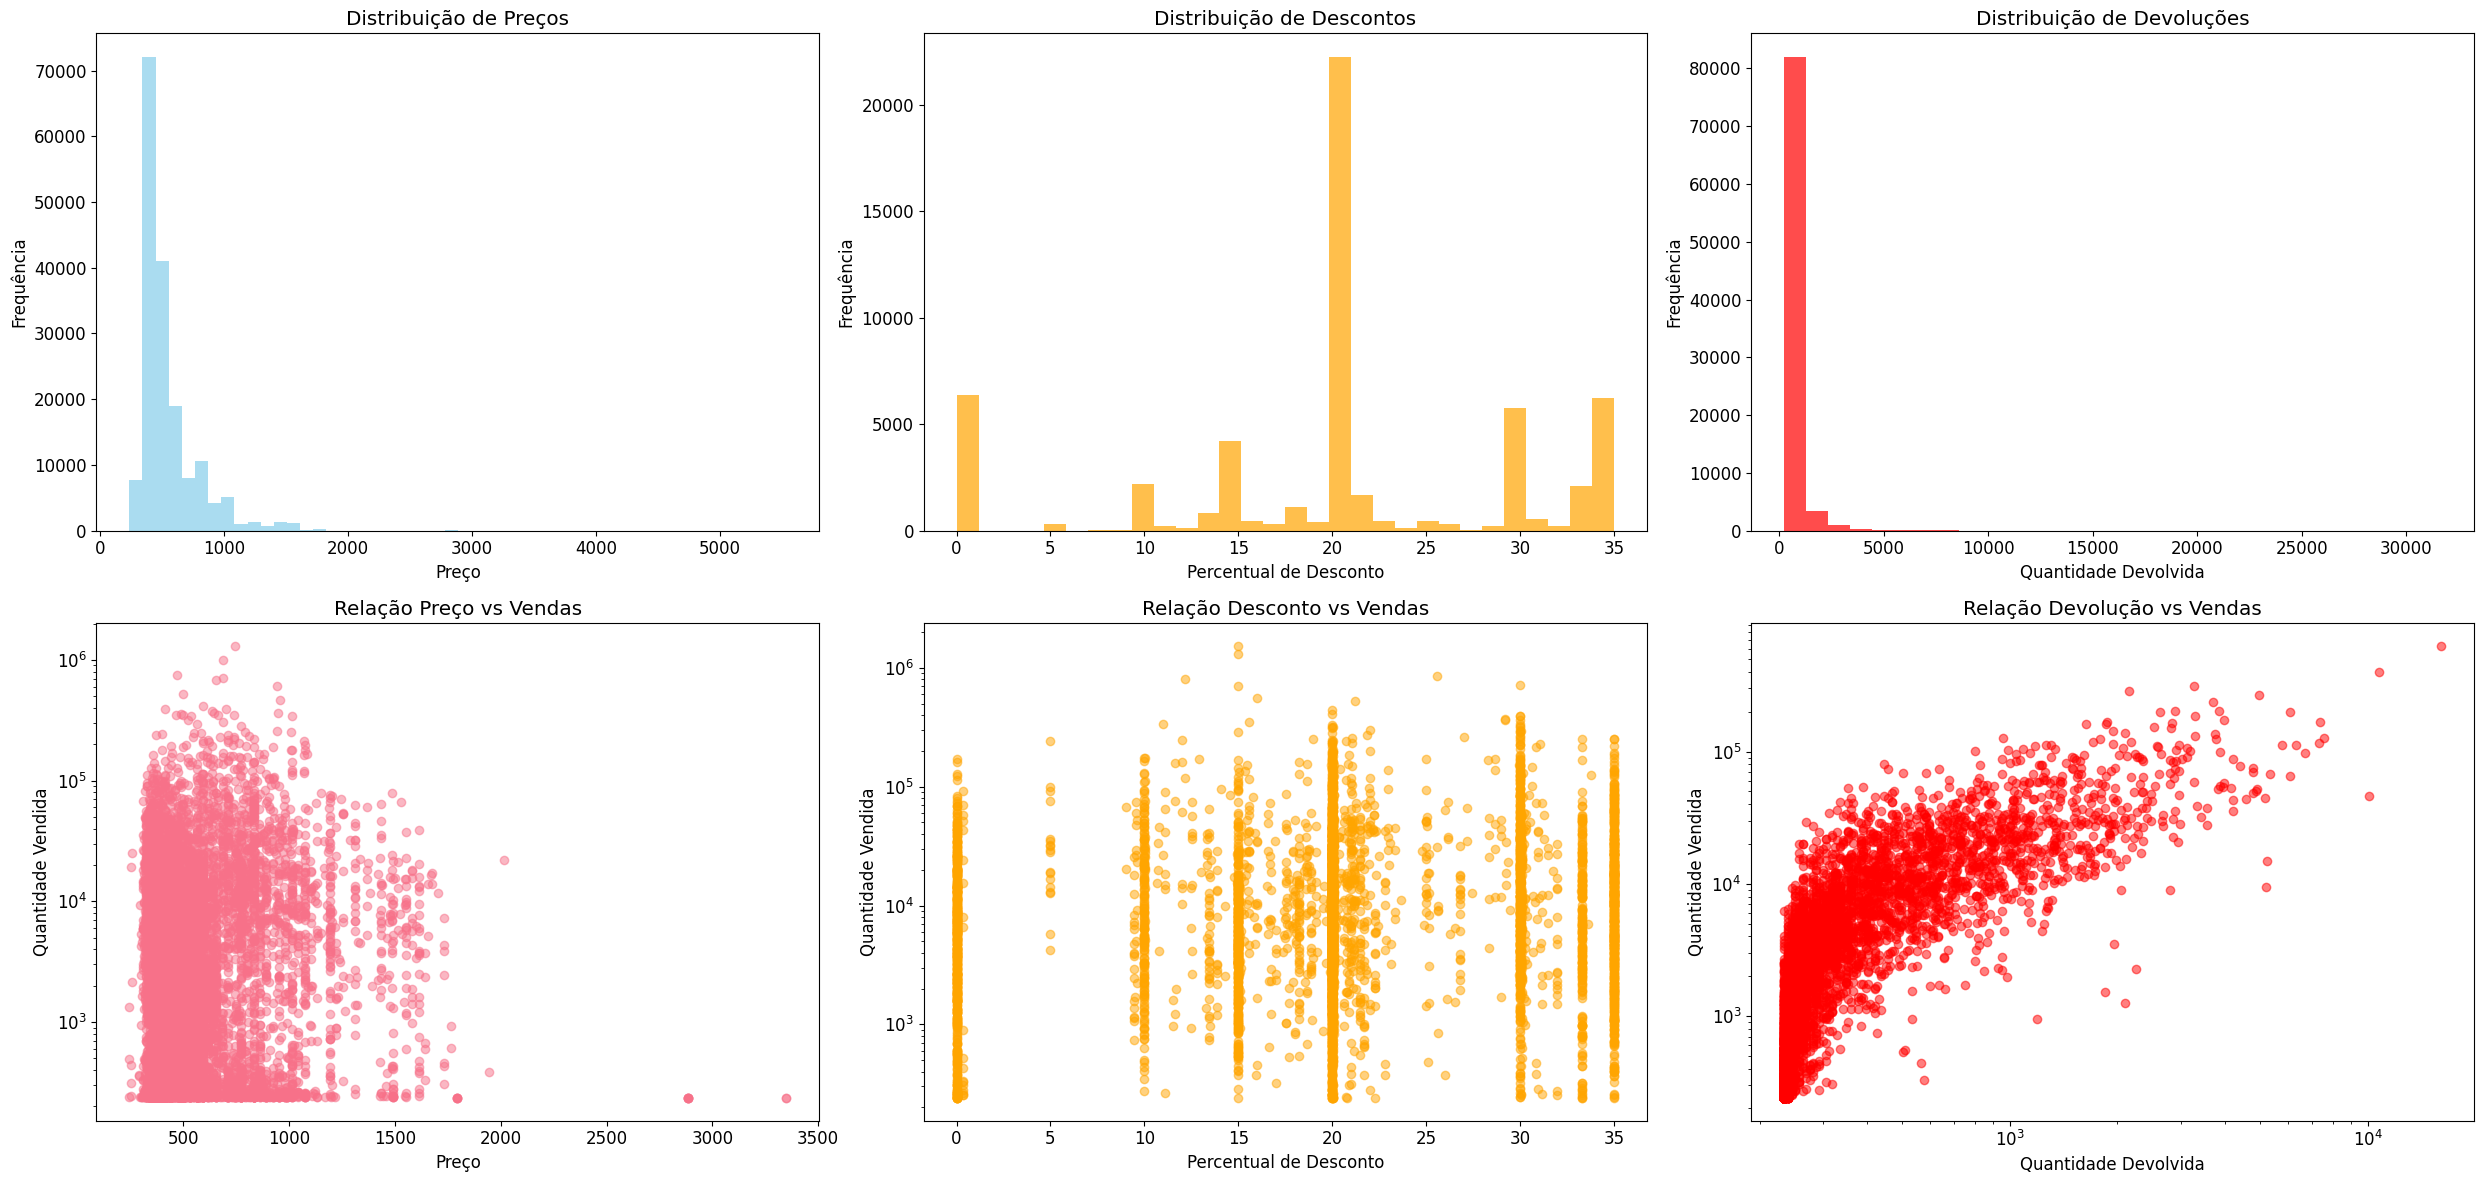

In [24]:
# Visualização de preços, descontos e devoluções
fig, axes = plt.subplots(2, 3, figsize=(25, 12))

# Distribuição de preços
axes[0,0].hist(df['VL_PRECO'], bins=50, alpha=0.7, color='skyblue')
axes[0,0].set_title('Distribuição de Preços')
axes[0,0].set_xlabel('Preço')
axes[0,0].set_ylabel('Frequência')

# Distribuição de descontos
if len(df_com_desconto) > 0:
    axes[0,1].hist(df_com_desconto['PCT_DESCONTO'], bins=30, alpha=0.7, color='orange')
    axes[0,1].set_title('Distribuição de Descontos')
    axes[0,1].set_xlabel('Percentual de Desconto')
    axes[0,1].set_ylabel('Frequência')

# Distribuição de devoluções
if len(df_com_devolucao) > 0:
    axes[0,2].hist(df_com_devolucao['QT_DEVOLUCAO'], bins=30, alpha=0.7, color='red')
    axes[0,2].set_title('Distribuição de Devoluções')
    axes[0,2].set_xlabel('Quantidade Devolvida')
    axes[0,2].set_ylabel('Frequência')

# Relação preço vs vendas
sample_size = min(10000, len(df))
df_sample = df.sample(sample_size)
axes[1,0].scatter(df_sample['VL_PRECO'], df_sample['QT_VENDA_BRUTO'], alpha=0.5)
axes[1,0].set_title('Relação Preço vs Vendas')
axes[1,0].set_xlabel('Preço')
axes[1,0].set_ylabel('Quantidade Vendida')
axes[1,0].set_yscale('log')

# Relação desconto vs vendas
if len(df_com_desconto) > 0:
    sample_desconto = df_com_desconto.sample(min(5000, len(df_com_desconto)))
    axes[1,1].scatter(sample_desconto['PCT_DESCONTO'], sample_desconto['QT_VENDA_BRUTO'], alpha=0.5, color='orange')
    axes[1,1].set_title('Relação Desconto vs Vendas')
    axes[1,1].set_xlabel('Percentual de Desconto')
    axes[1,1].set_ylabel('Quantidade Vendida')
    axes[1,1].set_yscale('log')

# Relação devolução vs vendas
if len(df_com_devolucao) > 0:
    sample_devolucao = df_com_devolucao.sample(min(5000, len(df_com_devolucao)))
    axes[1,2].scatter(sample_devolucao['QT_DEVOLUCAO'], sample_devolucao['QT_VENDA_BRUTO'], alpha=0.5, color='red')
    axes[1,2].set_title('Relação Devolução vs Vendas')
    axes[1,2].set_xlabel('Quantidade Devolvida')
    axes[1,2].set_ylabel('Quantidade Vendida')
    axes[1,2].set_yscale('log')
    axes[1,2].set_xscale('log')

plt.tight_layout()
plt.show()

## 9. 📋 Resumo dos Insights Principais

In [25]:
print("📋 RESUMO")
print("=" * 60)

insights = [
    f"📅 Período dos dados: {df['COD_CICLO'].min()} a {df['COD_CICLO'].max()} ({df['COD_CICLO'].nunique()} ciclos)",
    f"📊 Total de registros: {len(df):,} transações",
    f"🎯 Variável target: Distribuição assimétrica com outliers",
    f"📈 Sazonalidade: Identificada com período de 18 ciclos",
    f"🎉 Datas comemorativas: {(df['FLG_DATA'].sum()/len(df)*100):.1f}% dos registros",
    f"📢 Campanha mais frequente: B ({(df['FLG_CAMPANHA_MKT_B'].sum()/len(df)*100):.1f}% dos registros)",
    f"🏷️ Registros com desconto: {(df['PCT_DESCONTO'].notna().sum()/len(df)*100):.1f}%",
    f"↩️ Registros com devolução: {(df['QT_DEVOLUCAO'].notna().sum()/len(df)*100):.1f}%",
    f"🔗 Maior correlação: Receita Bruta vs Vendas ({df['VL_RECEITA_BRUTA'].corr(df['QT_VENDA_BRUTO']):.3f})",
    f"📦 Produtos únicos: {df['COD_MATERIAL'].nunique():,} SKUs",
    f"🏷️ Marcas únicas: {df['DES_MARCA_MATERIAL'].nunique()} marcas",
    f"📂 Categorias: {df['DES_CATEGORIA_MATERIAL'].nunique()} categorias"
]

for i, insight in enumerate(insights, 1):
    print(f"{i:2d}. {insight}")

print("\n" + "=" * 60)
print("✅ Análise exploratória concluída!")
print("📝 Próximo passo: Preparação dos dados e modelagem")

📋 RESUMO
 1. 📅 Período dos dados: 201801 a 202101 (53 ciclos)
 2. 📊 Total de registros: 173,923 transações
 3. 🎯 Variável target: Distribuição assimétrica com outliers
 4. 📈 Sazonalidade: Identificada com período de 18 ciclos
 5. 🎉 Datas comemorativas: 28.9% dos registros
 6. 📢 Campanha mais frequente: B (27.9% dos registros)
 7. 🏷️ Registros com desconto: 32.7%
 8. ↩️ Registros com devolução: 50.1%
 9. 🔗 Maior correlação: Receita Bruta vs Vendas (0.907)
10. 📦 Produtos únicos: 2,252 SKUs
11. 🏷️ Marcas únicas: 85 marcas
12. 📂 Categorias: 6 categorias

✅ Análise exploratória concluída!
📝 Próximo passo: Preparação dos dados e modelagem


## 10. 💾 Salvando Dados Limpos

In [26]:
# Salvando dataset limpo para a próxima etapa
output_path = 'C:/Users/leand/Desktop/desafio_boti/dataset_limpo.csv'
df.to_csv(output_path, index=False)
print(f"💾 Dataset limpo salvo em: {output_path}")
print(f"📊 Shape final: {df.shape}")
print("\n🎯 Dados prontos para a etapa de modelagem!")

💾 Dataset limpo salvo em: C:/Users/leand/Desktop/desafio_boti/dataset_limpo.csv
📊 Shape final: (173923, 21)

🎯 Dados prontos para a etapa de modelagem!
